In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, LSTM, Bidirectional, Dense

# Завантаження датасету
max_features = 10000  # Обмежте кількість слів (токенів) у словнику
maxlen = 500  # Обмежте максимальну кількість слів у відгуку
batch_size = 32

print('Завантаження даних...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
print(len(input_train), 'тренувальні послідовності')
print(len(input_test), 'тестові послідовності')

# Доповнення послідовностей до максимальної довжини
print('Доповнення даних (послідовностей до максимальної довжини {} слова)...'.format(maxlen))
input_train = pad_sequences(input_train, maxlen=maxlen)
input_test = pad_sequences(input_test, maxlen=maxlen)
print('Розмір тренувальних даних:', input_train.shape)
print('Розмір тестових даних:', input_test.shape)

# Створення та компіляція моделі RNN
model_rnn = Sequential()
model_rnn.add(Embedding(max_features, 32, input_length=maxlen))
model_rnn.add(SimpleRNN(32))
model_rnn.add(Dense(1, activation='sigmoid'))

model_rnn.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

# Навчання моделі RNN
print('Тренування моделі RNN...')
history_rnn = model_rnn.fit(input_train, y_train,
                            epochs=10,
                            batch_size=batch_size,
                            validation_split=0.2)

# Оцінка точності на тестовому наборі
print('Оцінка точності моделі RNN на тестовому наборі...')
results_rnn = model_rnn.evaluate(input_test, y_test)
print('Точність моделі RNN:', results_rnn[1])

# Створення та компіляція моделі LSTM
model_lstm = Sequential()
model_lstm.add(Embedding(max_features, 32, input_length=maxlen))
model_lstm.add(LSTM(32))
model_lstm.add(Dense(1, activation='sigmoid'))

model_lstm.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

# Навчання моделі LSTM
print('Тренування моделі LSTM...')
history_lstm = model_lstm.fit(input_train, y_train,
                              epochs=10,
                              batch_size=batch_size,
                              validation_split=0.2)

# Оцінка точності на тестовому наборі
print('Оцінка точності моделі LSTM на тестовому наборі...')
results_lstm = model_lstm.evaluate(input_test, y_test)
print('Точність моделі LSTM:', results_lstm[1])

# Створення та компіляція двосторонньої моделі LSTM
model_bilstm = Sequential()
model_bilstm.add(Embedding(max_features, 32, input_length=maxlen))
model_bilstm.add(Bidirectional(LSTM(32)))
model_bilstm.add(Dense(1, activation='sigmoid'))

model_bilstm.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

# Навчання двосторонньої моделі LSTM
print('Тренування двосторонньої моделі LSTM...')
history_bilstm = model_bilstm.fit(input_train, y_train,
                                  epochs=10,
                                  batch_size=batch_size,
                                  validation_split=0.2)

# Оцінка точності на тестовому наборі
print('Оцінка точності двосторонньої моделі LSTM на тестовому наборі...')
results_bilstm = model_bilstm.evaluate(input_test, y_test)
print('Точність двосторонньої моделі LSTM:', results_bilstm[1])



Завантаження даних...
25000 тренувальні послідовності
25000 тестові послідовності
Доповнення даних (послідовностей до максимальної довжини 500 слова)...
Розмір тренувальних даних: (25000, 500)
Розмір тестових даних: (25000, 500)


Тренування моделі RNN...
Epoch 1/10


625/625 [==============================] - 34s 53ms/step - loss: 0.5898 - accuracy: 0.6711 - val_loss: 0.4087 - val_accuracy: 0.8214
Epoch 2/10
625/625 [==============================] - 37s 59ms/step - loss: 0.3644 - accuracy: 0.8479 - val_loss: 0.3501 - val_accuracy: 0.8552
Epoch 3/10
625/625 [==============================] - 39s 62ms/step - loss: 0.2888 - accuracy: 0.8829 - val_loss: 0.3975 - val_accuracy: 0.8198
Epoch 4/10
625/625 [==============================] - 39s 62ms/step - loss: 0.2421 - accuracy: 0.9039 - val_loss: 0.3776 - val_accuracy: 0.8390
Epoch 5/10
625/625 [==============================] - 39s 62ms/step - loss: 0.2062 - accuracy: 0.9227 - val_loss: 0.3732 - val_accuracy: 0.8562
Epoch 6/10
625/625 [=

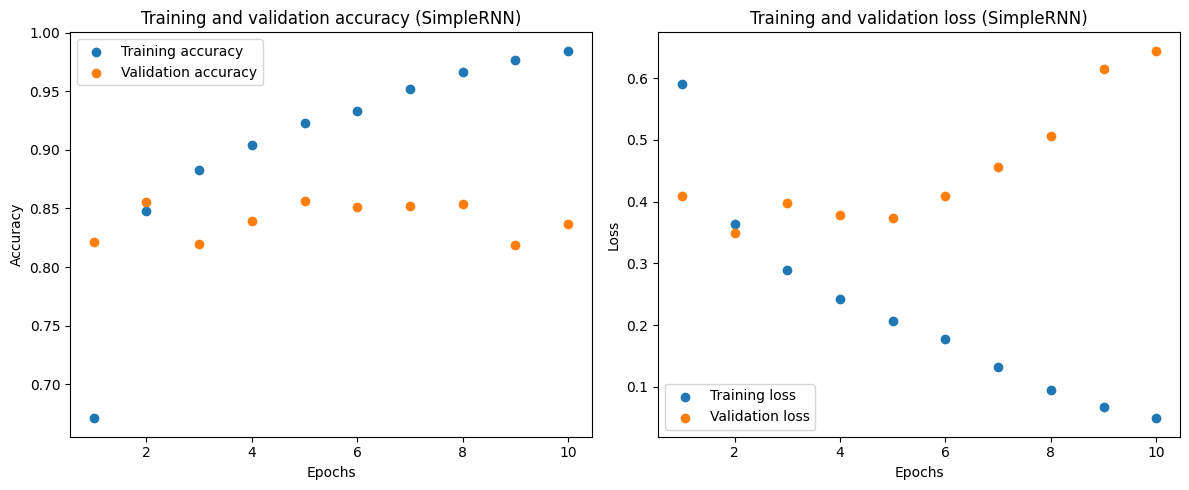

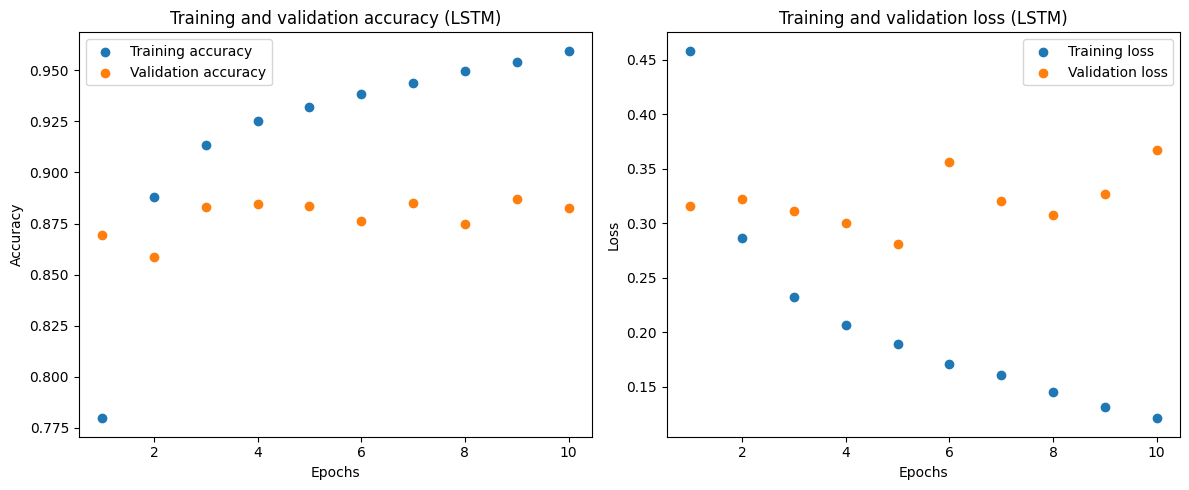

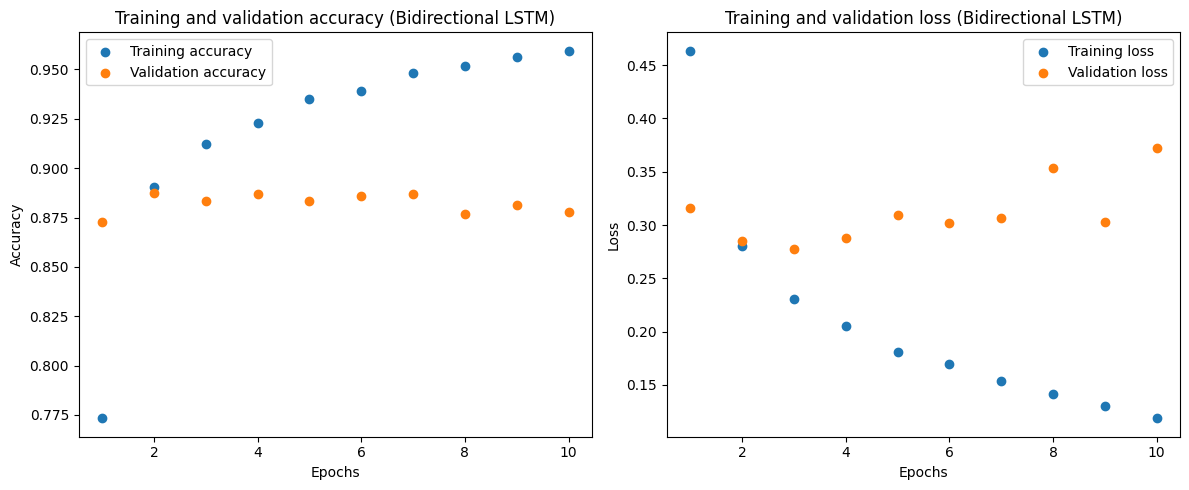

In [3]:
import matplotlib.pyplot as plt

def plot_history(history, model_type):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.scatter(epochs, acc, label='Training accuracy')
    plt.scatter(epochs, val_acc, label='Validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title(f'Training and validation accuracy ({model_type})')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.scatter(epochs, loss, label='Training loss')
    plt.scatter(epochs, val_loss, label='Validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title(f'Training and validation loss ({model_type})')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Побудова графіків для кожної моделі
plot_history(history_rnn, 'SimpleRNN')
plot_history(history_lstm, 'LSTM')
plot_history(history_bilstm, 'Bidirectional LSTM')
